In [2]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

In [6]:
file = '/home/ec2-user/segmenter/MAIDA/data1000/test_annotations_4cls.json'
with open(file) as f:
    data = json.load(f)

In [47]:
data['categories']

[{'id': 3043, 'name': 'Invalid', 'supercategory': ''},
 {'id': 3042, 'name': 'No Finding', 'supercategory': ''},
 {'id': 3046, 'name': 'carina', 'supercategory': ''},
 {'id': 3047, 'name': 'tip', 'supercategory': ''},
 {'id': 3048, 'name': 'left clavicle', 'supercategory': ''},
 {'id': 3049, 'name': 'right clavicle', 'supercategory': ''}]

In [7]:
test_ids = [i['id'] for i in data['images']]
id_bbox_map = {}

for test_id in test_ids:
    for ann in data['annotations']:
        if ann['image_id'] == test_id:
            if test_id not in id_bbox_map.keys():
                id_bbox_map[test_id] = {}
            if ann['category_id'] not in id_bbox_map[test_id].keys():
                id_bbox_map[test_id][ann['category_id']] = []
            id_bbox_map[test_id][ann['category_id']].append(ann['bbox'])
id_bbox_map

{2946094: {3049: [[655.2100703284108,
    269.3852303291937,
    26.069246435846317,
    30.41412084181937]],
  3048: [[440.5732746732857,
    293.71652700264923,
    39.10386965376776,
    30.41412084181937]],
  3047: [[540.5053860106925,
    260.69548151724536,
    4.3448744059741955,
    13.034623217922585]],
  3046: [[570.0505319713169,
    493.5807496774625,
    56.48336727766454,
    34.758995247793564]]},
 2946082: {3048: [[574.7621839501224,
    407.78129115059045,
    15.657943613981809,
    26.096572689970824]],
  3049: [[738.648660443139,
    380.64085555302074,
    52.19314537994165,
    31.315887227965046]],
  3047: [[674.9730230796098,
    370.2398000764552,
    31.315887227965902,
    2.5157232704402515]],
  3046: [[665.5782569112206,
    554.9659611220261,
    46.973830841947716,
    31.31588722796476]]},
 2946108: {3048: [[542.4673311734455,
    263.1150268753165,
    94.54316173608497,
    127.05405134493739]],
  3049: [[703.0785996088981,
    271.4109090513685,
    1

In [36]:
vecs = []
for id in id_bbox_map.keys():
    if 3047 not in id_bbox_map[id].keys():
        continue
    if 3049 not in id_bbox_map[id].keys():
        print(id)
        continue
    x1, y1, w1, h1 = id_bbox_map[id][3049][0]
    x2, y2, w2, h2 = id_bbox_map[id][3047][0]
    mid1 = np.array([x1+w1/2, y1+h1/2])
    mid2 = np.array([x2+w2/2, y2+h2/2])
    vecs.append(mid2-mid1)

2946151


In [37]:
vecs = np.array(vecs)
vecs

array([[-1.25566870e+02, -1.73794976e+01],
       [-7.41142664e+01, -2.48011375e+01],
       [-1.09074857e+02, -8.78227498e+00],
       [ 1.42523850e+02, -3.59928373e+01],
       [-6.81611416e+01, -4.24560621e+01],
       [-2.86490531e+02, -6.72192337e+01],
       [-7.31580509e+01,  2.67450528e+01],
       [-1.26829343e+02, -8.35090326e+01],
       [-1.24054313e+02, -9.23574811e+01],
       [-9.65676040e+01,  7.53360482e+01],
       [-9.50859918e+01, -1.39150232e+01],
       [-9.72457832e+01, -2.54691337e+01],
       [-1.88955996e+01, -9.42904571e+01],
       [-2.21370921e+01,  9.81821209e+01],
       [-1.50909654e+02,  8.84964019e+01],
       [-5.74041090e+01, -7.79055765e+01],
       [-7.89306499e+01, -1.02507338e+00],
       [-1.20463268e+02,  1.53339702e+02],
       [-5.78808140e+01, -5.71555202e+01],
       [-9.18765126e+01, -1.72183002e+01],
       [ 9.54555037e+01, -1.58916913e+02],
       [-4.26218270e+01,  7.02918683e+01],
       [-1.04602148e+02,  3.71090721e+01],
       [-9.

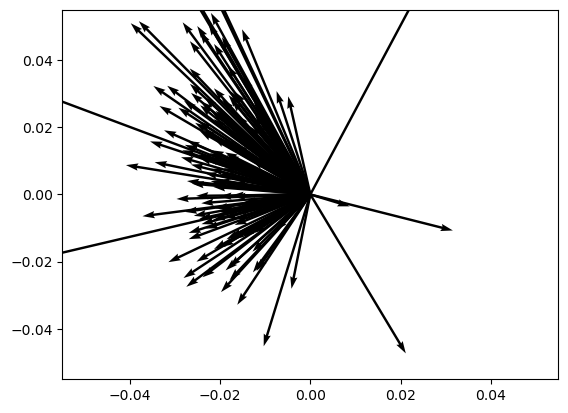

In [44]:
# origin = np.array([[0, 0],[0, 0]]) # origin point
x = np.zeros(len(vecs))
y = np.zeros(len(vecs))
plt.quiver(x, y, vecs[:, 0], vecs[:, 1], scale=100, scale_units='inches')
plt.show()

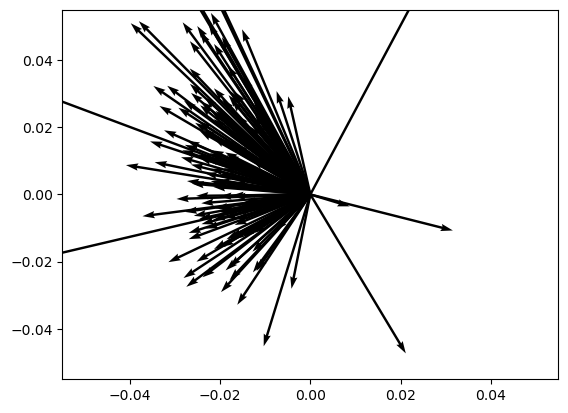

In [46]:
from view_tools import *
test_ids = [i['id'] for i in data['images']]
plot_position_arrows(test_ids,file='/home/ec2-user/segmenter/MAIDA/data1000/test_annotations_4cls.json',
                         from_cls=3049, to_cls=3047)